### Atividade

Instruções

- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = sns.load_dataset('mpg')

#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [20]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [21]:
df.shape

(398, 9)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape


(392, 9)

#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


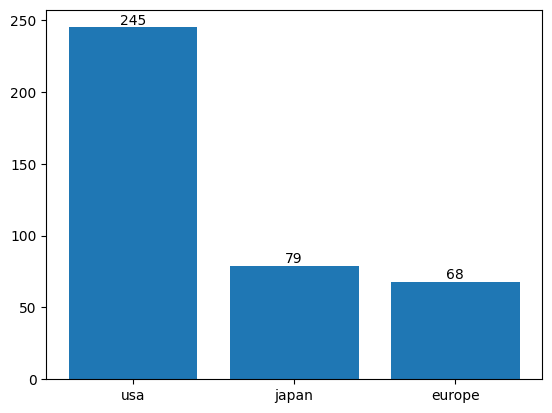

In [34]:
fig, ax = plt.subplots()

x = df['origin'].value_counts().index
y = df['origin'].value_counts().values


bars = ax.bar(x, y)
ax.bar_label(bars)
plt.show()

#### Questão 3

Qual a média da potência (*horsepower*) dos carros por origem?

In [35]:
df.groupby('origin')['horsepower'].mean().reset_index()

,origin,horsepower
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


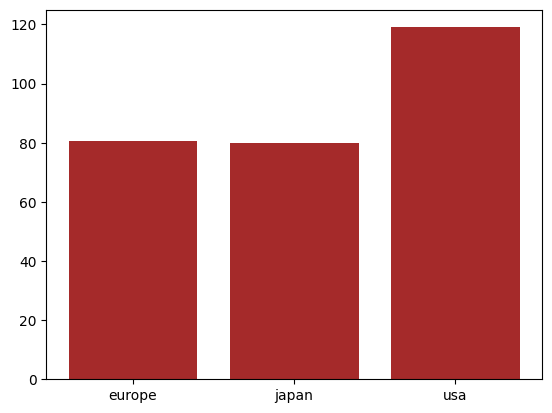

In [40]:
x = df.groupby('origin')['horsepower'].mean().index
y = df.groupby('origin')['horsepower'].mean().values

plt.bar(x, y, color='brown')
ax.bar_label(bars)
plt.show()

#### Questão 4

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) cos carros?

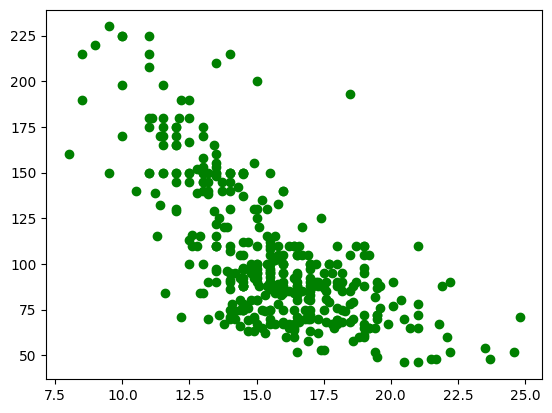

In [41]:
# visualizando o resultado em um gráfico de dispersão
x_scatter = df['acceleration']
y_scatter = df['horsepower']
plt.scatter(x_scatter, y_scatter, color='green')
plt.show()

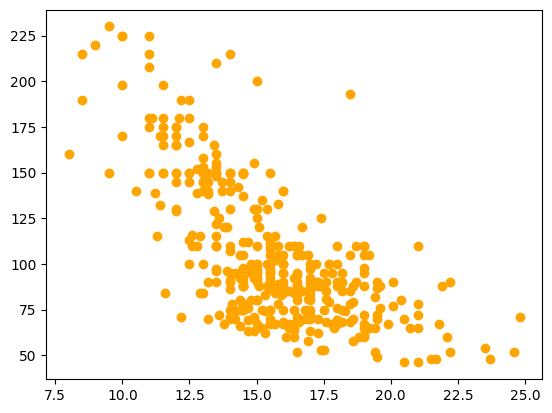

In [46]:
# Outra forma, passando o 'dataframe no parametro data'

plt.scatter(data=df, x='acceleration', y='horsepower', color='orange')
plt.show()

#### Questão 5

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

In [30]:
df_usa = df.query("origin == 'usa'")
df_japan = df.query("origin == 'japan'")
df_europe = df.query("origin == 'europe'")

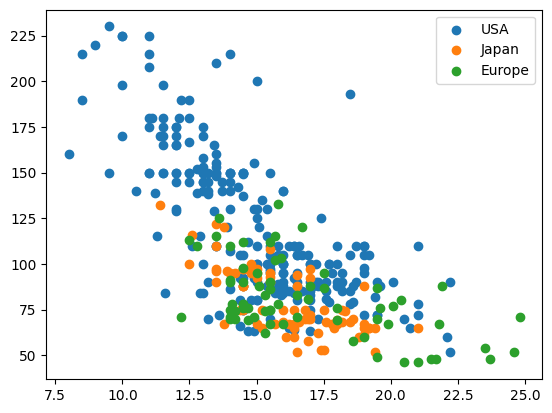

In [31]:
fig = plt.subplot()
plt.scatter('acceleration', 'horsepower', data=df_usa, label='USA')
plt.scatter('acceleration', 'horsepower', data=df_japan, label='Japan')
plt.scatter('acceleration', 'horsepower', data=df_europe, label='Europe')
plt.legend()
plt.show()


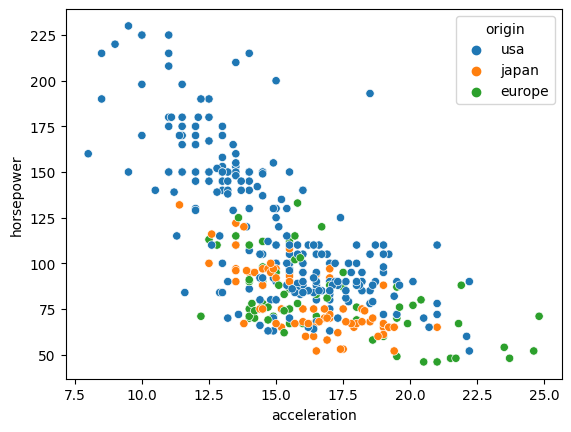

In [32]:
sns.scatterplot(x=df['acceleration'], y=df['horsepower'], hue=df['origin']);

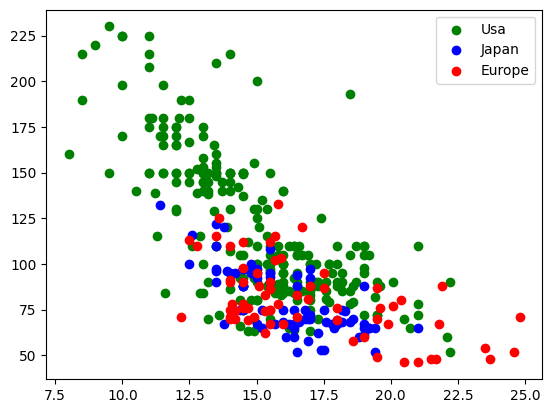

In [49]:
plt.scatter(data=df[df['origin']=='usa'], 
            x='acceleration', 
            y='horsepower', 
            c='green', 
            label='Usa')

plt.scatter(data=df[df['origin']=='japan'], 
            x='acceleration', 
            y='horsepower', 
            c='blue', 
            label='Japan')

plt.scatter(data=df[df['origin']=='europe'], 
            x='acceleration', 
            y='horsepower', 
            c='red', 
            label='Europe')


plt.legend()
plt.show()